# Deutsch Algorithm

## A Quantum Search Algorithm

Imagine you had a hundred hands in front of you, each hand holding a heads or tails coin. On a classical computer, you would have to search through all of the hands. What if I told you that with a quantum computer, solving this problem can be done by opening all hands at once(without individually searching through all of them). Let us see how we would construct this algorithm.

**The problem**: Imagine someone is hiding a coin in each of their hands. The coin, when revealed, can be either heads or tails. Since there are two coins, there are 4 possible results in the sample space as given below.

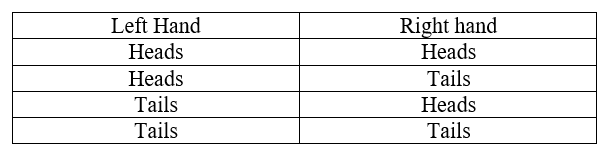

The first and fourth outcome is an example of a constant outcome, whereas the second and third are balanced outcomes. If I were to reveal my left hand, and say it was heads, there is still not enough information to determine the value of the coin in the right hand. Imagine if there were 100 hands in front of you and you had to search through each of the hands one at a time. There are 2100 results in the sample space of all possible outcomes. In the worst case, you would have to look until the 51st hand, because if the first 50 were heads, the 51st would indicate whether the outcome is balanced(tails) or constant(heads).

What if I told you that with a quantum computer, solving this problem can be done by opening all hands at once(without individually searching through all of them). Let us see how we would construct this algorithm.

Let us substitute heads with 0 and tails with 1, since there can only be two possible outcomes.

Then the result of each hand can be the result of applying a function 𝑓 to a set of inputs which maps a single bit(0 or 1) to 𝑓(0) or 𝑓(1). If 𝑓(0)=𝑓(1) then f is constant otherwise it is balanced.

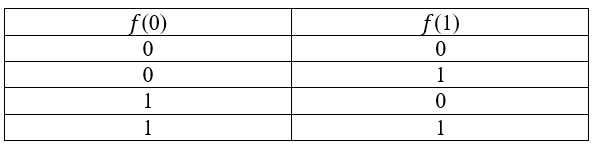

We can think of this function as a black box, or oracle, that is hidden from us. In the black box we don't know whether the function is hidden, constant or balanced.

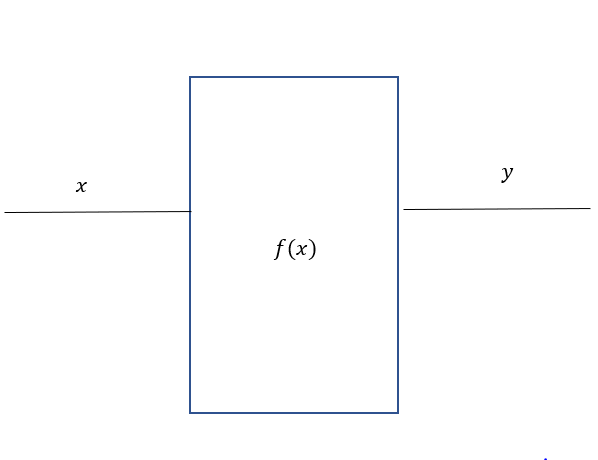

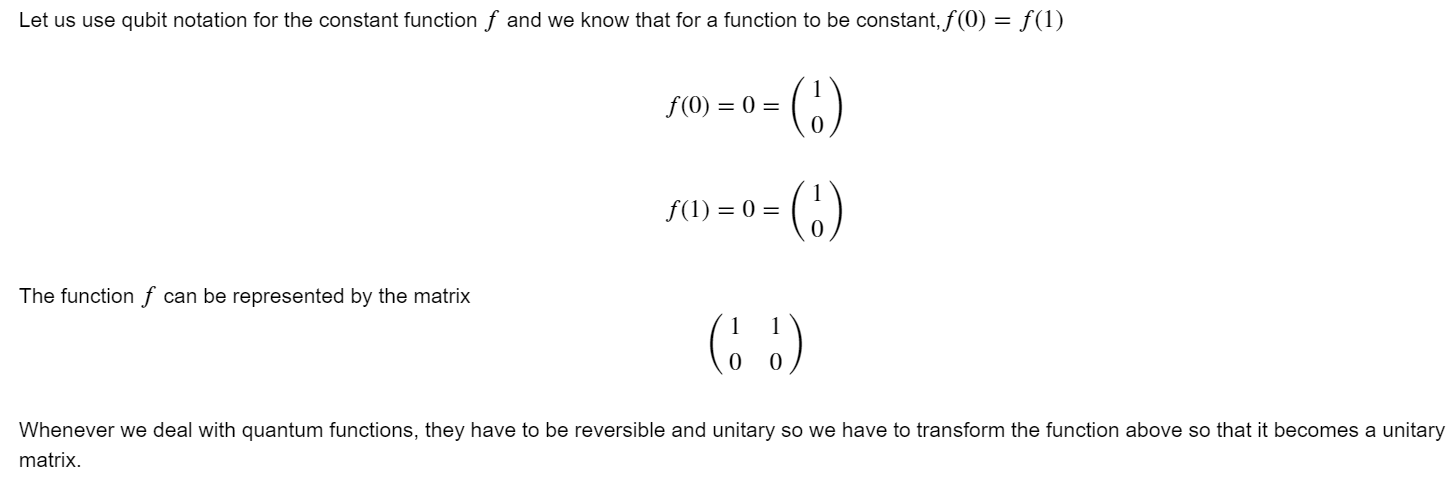

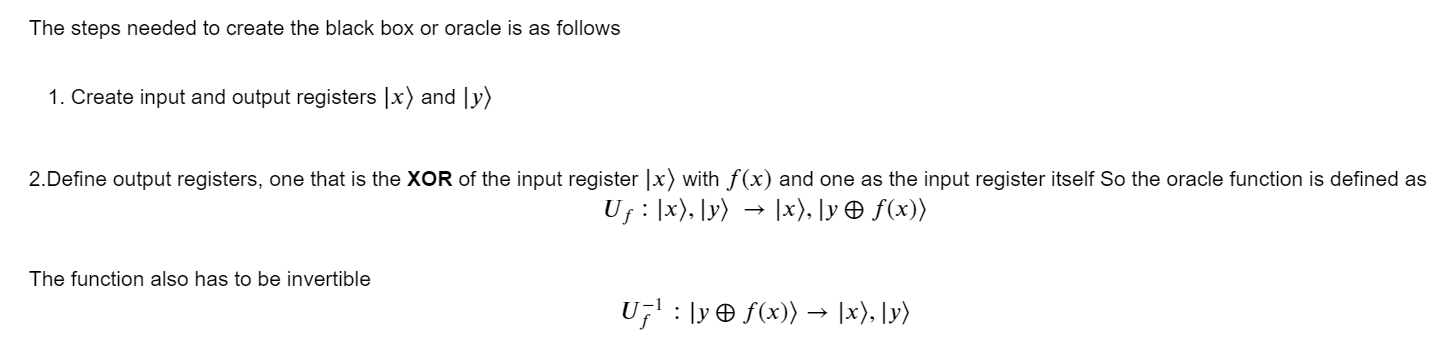

## Implementing Deutsch algorithm on qiskit 

In [1]:
from qiskit import *
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

### Step 1: Create a 2 qubit circuit 

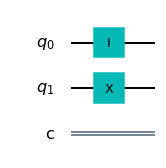

In [2]:
qc=QuantumCircuit(2,1)
qc.i(0)
qc.x(1)
qc.draw(output='mpl')

𝑞0 is set to |0⟩ and 𝑞1 is set to |1⟩

### Step 2: Apply a hadamard gate to all qubits 

Now we will create a superposition state using Hadamard Gates so that we can iterate through all 4 states of the 2 qubit system at once.

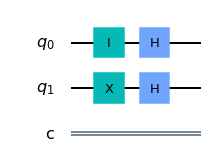

In [3]:
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

### Step 3:Apply hadamard gate to first qubit

After applying hadamard gates, the resulting value for the quantum registers will be 
$$ \frac{1}{\sqrt{2}}(|00\rangle-|01\rangle+|01\rangle-|11\rangle) ----> Equation 1$$

Since the second qubit is in a negative superposition of $H|1\rangle$, we can define equation 1 in terms of our unitary function

$$ \frac{(-1)^{f(0)}|0\rangle+(-1)^{f(1)}|1\rangle}{\sqrt{2}}\cdot{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}$$

If $f$ is a constant function, then $f(0)=0$ and $(-1)^0=1$ and $f(1)=0$

If $f$ is constant, we get

$$\pm{\frac{(|0\rangle+|1\rangle)}{\sqrt{2}}}{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}$$

If $f$ is balanced, we get

$$\pm{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}$$

For a constant function, the first qubit is set to

$${\frac{(|0\rangle+|1\rangle)}{\sqrt{2}}}$$

as applying a Hadamard gate to this superposition state will return it to the $|0\rangle$ state

For a balanced function, the first qubit is set to the following superposition state

$${\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}$$

applying a Hadamard gate to this superposition state will return it to the  |1⟩  state

By measuring only the first qubit after applying the Hadamard gate we will get a result that is either |0⟩ or |1⟩ and we know the function is constant if |0⟩ is returned and balanced if |1⟩ is returned

### Step 4: Apply CNOT gate

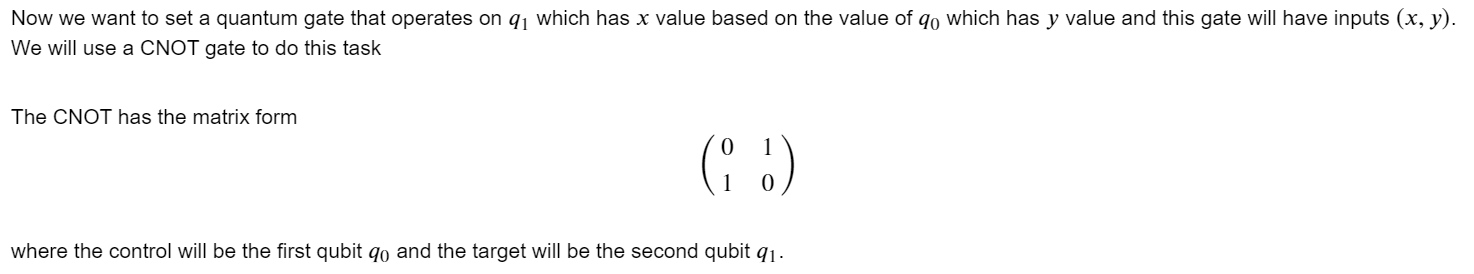

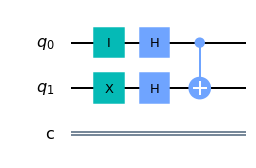

In [4]:
qc.cx(0,1)
qc.draw(output='mpl')

### Step 5: Add the Hadamard gates to the qubits

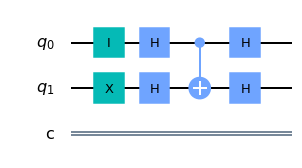

In [5]:
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

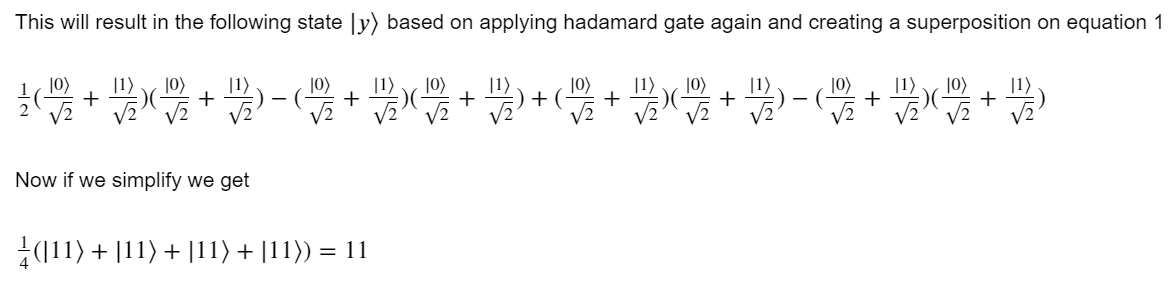

### Step 6: Take the measurement of the first qubit of the circuit

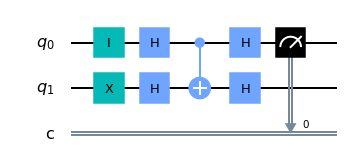

In [6]:
qc.measure(0,0)
qc.draw(output='mpl')

### Step 7: Run the circuit on a quantum simulator and quantum computer 

{'1': 1024}


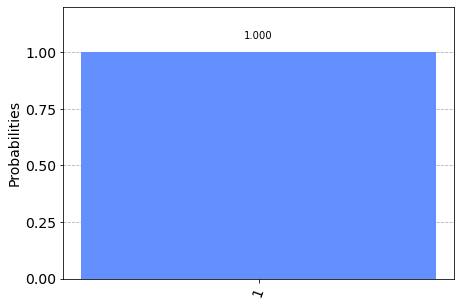

In [7]:
backend=Aer.get_backend('qasm_simulator')
result=execute(qc,backend=backend,shots=1024).result()
counts=result.get_counts(qc)
print(counts)
plot_histogram(counts)

Since our result is 1, we get a balanced function.

To run it on a quantum computer

In [ ]:
IBMQ.load_account()
provide=IBMQ.get_provider('ibm-q')
qcomp=provide.get_backend('ibmq_vigo')
result=execute(qc,backend=qcomp,shots=1024).result()
counts=result.get_counts(qc)
print(counts)
plot_histogram(counts)